In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("laptop_price.csv", encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.shape

(1303, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
df.isna().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [7]:
df.drop(columns=['laptop_ID'],inplace=True)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Since Ram and Weight are in object so extracting only the number from these two columns converting into integer and float respectively

In [8]:
df['Ram']=df['Ram'].str.replace('GB','').astype('int32')
df['Weight']=df['Weight'].str.replace('kg','').astype('float32')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


EDA

<Axes: xlabel='Price_euros', ylabel='Count'>

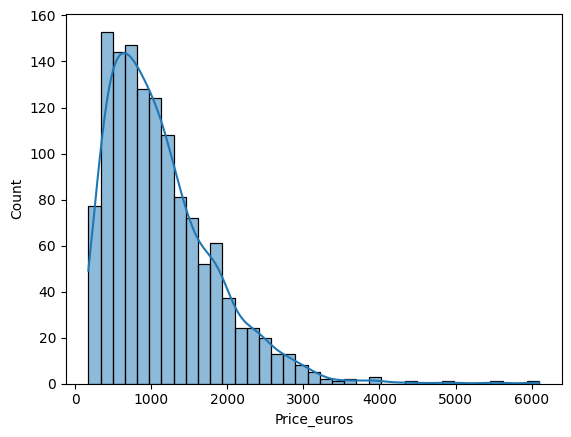

In [10]:
sns.histplot(df['Price_euros'],kde=True)

From thew above plot the data is right screwed where there are many laptops with low price

<Axes: xlabel='count', ylabel='Company'>

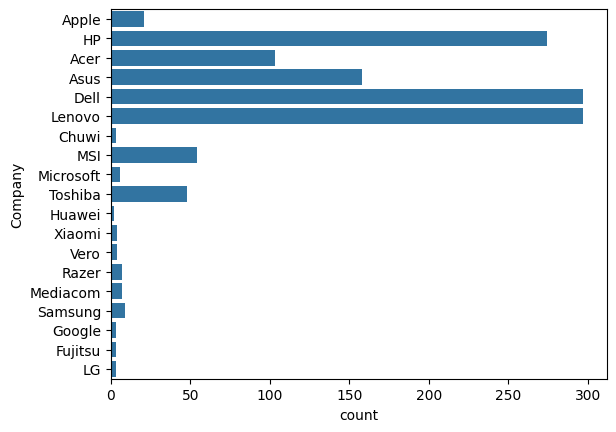

In [11]:
sns.countplot(df['Company'])

In the data we can clearly see that Dell and Lenevo laptop are more in number followed by HP,Asusand so on.

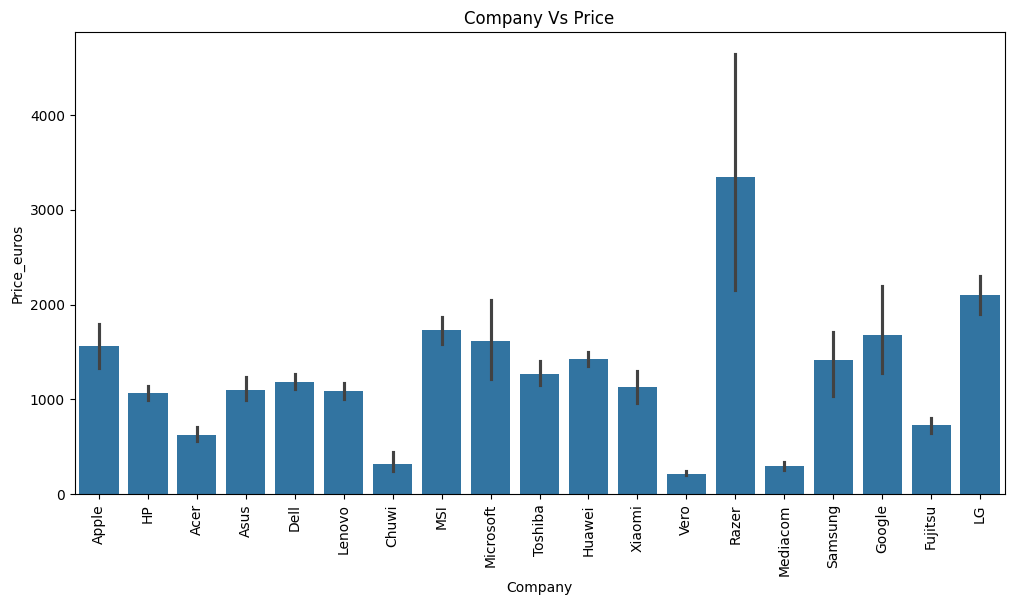

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.title("Company Vs Price")
plt.xticks(rotation=90)
plt.show()

From the above plot we can clealy see that Razer's laptop price is highest followed b y LG,MSI,Apple and so on.

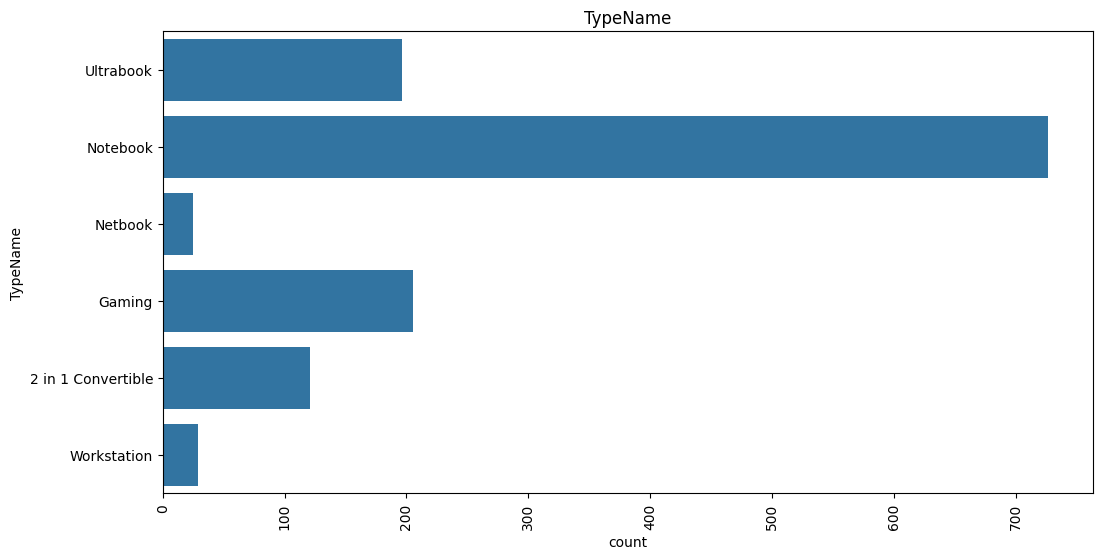

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(df['TypeName'])
plt.title("TypeName")
plt.xticks(rotation=90)
plt.show()

Higher number of laptop in the dataset is Notebook followed by Ultrebook, Gamming and so on.

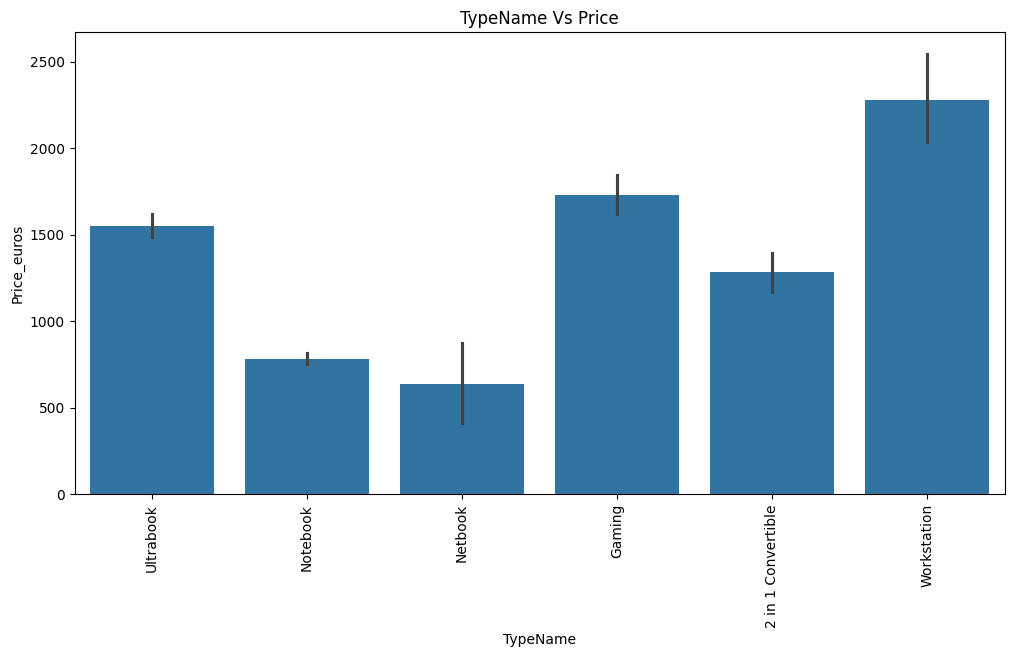

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.title("TypeName Vs Price")
plt.xticks(rotation=90)
plt.show()

Workstation laptop cost more than other laptop, followed by Gaming.

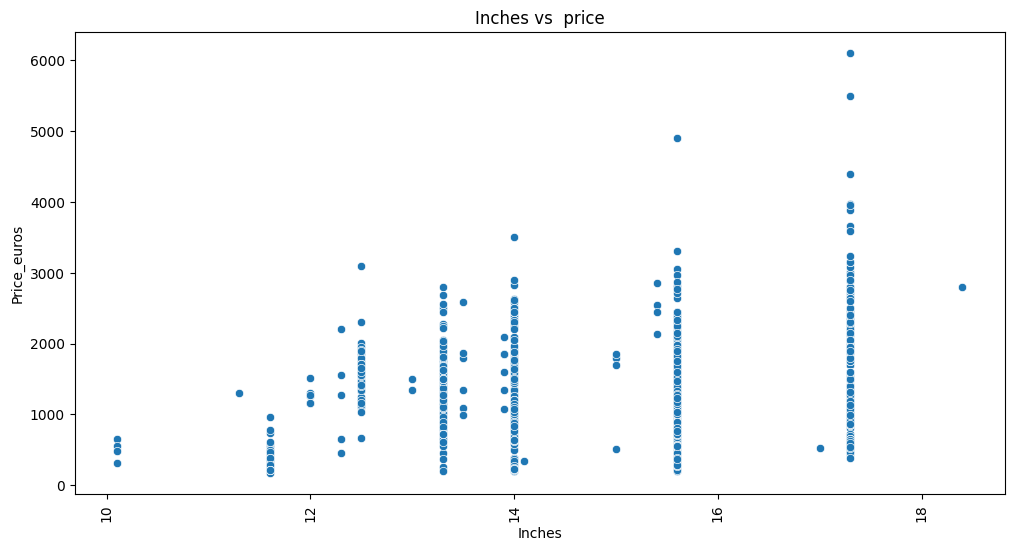

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])
plt.title("Inches vs  price")
plt.xticks(rotation=90)
plt.show()

It shows somehow when the inches or size of lapto increases the prices also increases but not more difference

In [16]:
df['Torchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [17]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Torchscreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<Axes: xlabel='Ram'>

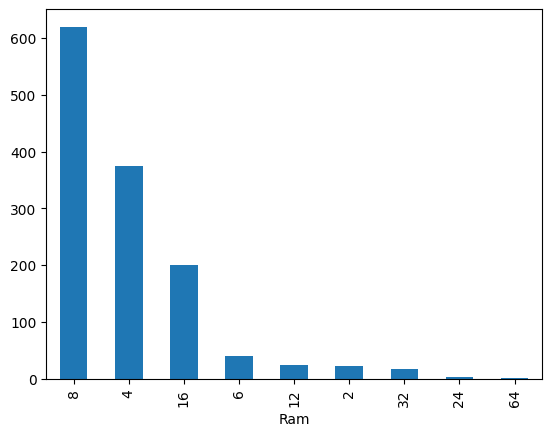

In [18]:
df['Ram'].value_counts().plot(kind='bar')

8 GB Ram Laptop is more in number in our dataset

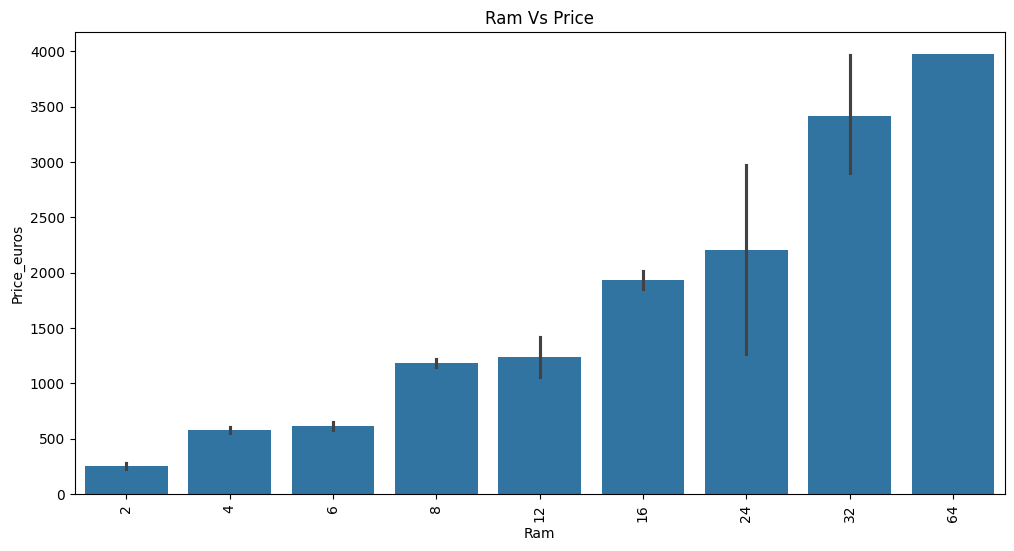

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.title("Ram Vs Price")
plt.xticks(rotation=90)
plt.show()

The laptop with 64 GB Ram has highest Price as compared to other which states that when Ram of the laptop increases prices also increases which shows strong correlation

In [20]:

def extract_resolution(resolution_string):
    res_parts = resolution_string.split("x")
    x_res = int(res_parts[0].split()[-1])
    y_res = int(res_parts[1])
    return x_res, y_res



df[['x_res', 'y_res']] = pd.DataFrame(df['ScreenResolution'].apply(extract_resolution).tolist(), index= df.index)

print(df[['ScreenResolution', 'x_res', 'y_res']].head())


                     ScreenResolution  x_res  y_res
0  IPS Panel Retina Display 2560x1600   2560   1600
1                            1440x900   1440    900
2                   Full HD 1920x1080   1920   1080
3  IPS Panel Retina Display 2880x1800   2880   1800
4  IPS Panel Retina Display 2560x1600   2560   1600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  Torchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  x_res             1303 non-null   int64  
 15  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64

In [22]:
num_columnms=df.select_dtypes(exclude='object').columns
num_columnms

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'Torchscreen', 'Ips', 'x_res',
       'y_res'],
      dtype='object')

In [23]:
df[num_columnms].corr()['Price_euros']

,Price_euros
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price_euros,1.000000
Torchscreen,0.191226
Ips,0.252208
x_res,0.556529
y_res,0.552809


In [24]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [25]:
num_columnms=df.select_dtypes(exclude='object').columns
num_columnms

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'Torchscreen', 'Ips', 'x_res',
       'y_res', 'ppi'],
      dtype='object')

In [26]:
df[num_columnms].corr()['Price_euros']

,Price_euros
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price_euros,1.000000
Torchscreen,0.191226
Ips,0.252208
x_res,0.556529
y_res,0.552809
ppi,0.473487


In [27]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [28]:
df.drop(columns=['Inches','x_res','y_res'],inplace=True)

In [29]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [30]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Torchscreen,Ips,ppi,Cpu Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [31]:
df['Cpu Name'].value_counts()

,count
Cpu Name,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
Intel Celeron Dual,80
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
Intel Celeron Quad,8
AMD A6-Series 9220,8


In [32]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [33]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<Axes: xlabel='count', ylabel='Cpu brand'>

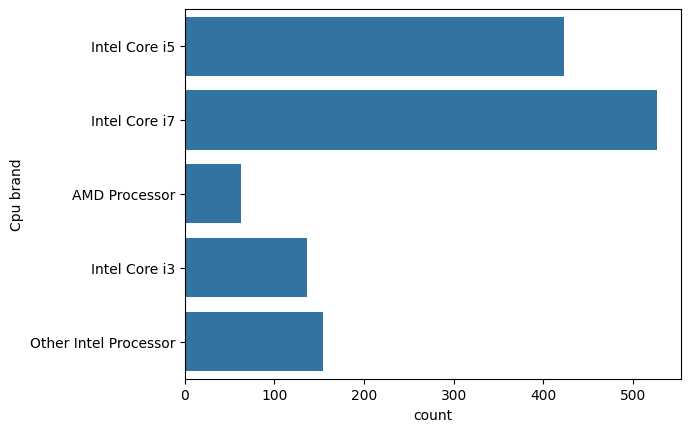

In [34]:
sns.countplot(df['Cpu brand'])

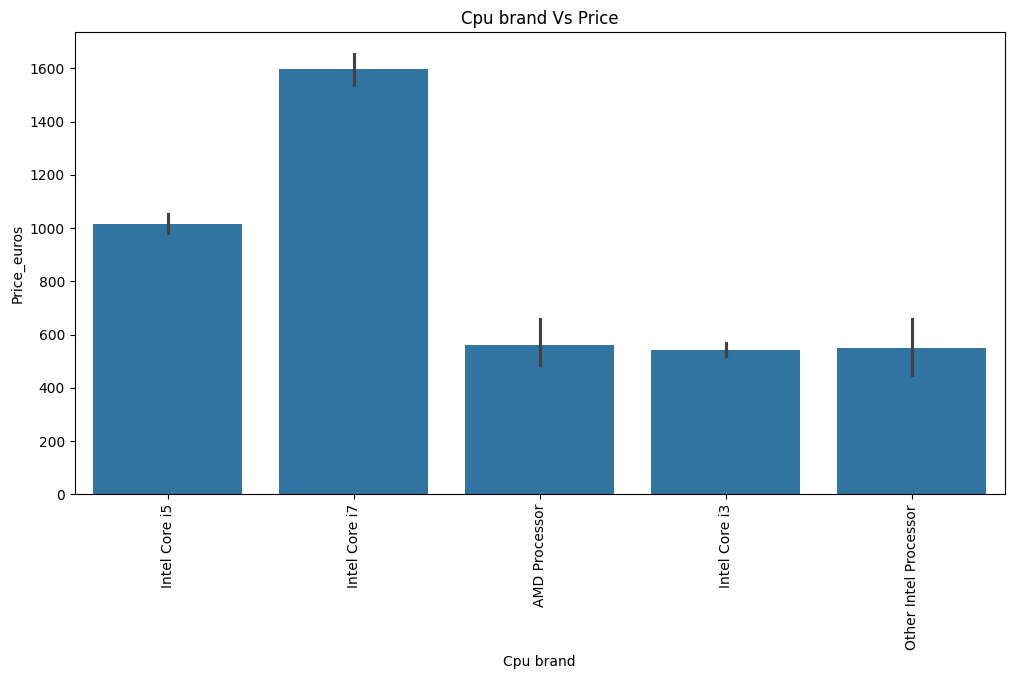

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])
plt.title("Cpu brand Vs Price")
plt.xticks(rotation=90)
plt.show()

Intel core i7 cost more than other processor

In [36]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Torchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


In [37]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [38]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [39]:
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True).str.replace('GB', '').str.replace('TB', '000')
new = df['Memory'].str.split("+", expand=True).fillna("0")

df["HDD"] = (new[0].str.extract(r'(\d+)')[0].astype(int) * new[0].str.contains("HDD").astype(int) +
             new[1].str.extract(r'(\d+)')[0].astype(int) * new[1].str.contains("HDD").astype(int))
df["SSD"] = (new[0].str.extract(r'(\d+)')[0].astype(int) * new[0].str.contains("SSD").astype(int) +
             new[1].str.extract(r'(\d+)')[0].astype(int) * new[1].str.contains("SSD").astype(int))
df["Hybrid"] = (new[0].str.extract(r'(\d+)')[0].astype(int) * new[0].str.contains("Hybrid").astype(int) +
                new[1].str.extract(r'(\d+)')[0].astype(int) * new[1].str.contains("Hybrid").astype(int))
df["Flash_Storage"] = (new[0].str.extract(r'(\d+)')[0].astype(int) * new[0].str.contains("Flash Storage").astype(int) +
                       new[1].str.extract(r'(\d+)')[0].astype(int) * new[1].str.contains("Flash Storage").astype(int))

df.drop(columns=['Memory'], inplace=True)


In [40]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Torchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [41]:
num_columnms=df.select_dtypes(exclude='object').columns
num_columnms

Index(['Ram', 'Weight', 'Price_euros', 'Torchscreen', 'Ips', 'ppi', 'HDD',
       'SSD', 'Hybrid', 'Flash_Storage'],
      dtype='object')

In [42]:
df[num_columnms].corr()['Price_euros']

,Price_euros
Ram,0.743007
Weight,0.210370
Price_euros,1.000000
Torchscreen,0.191226
Ips,0.252208
ppi,0.473487
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
Flash_Storage,-0.040511


In [43]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [44]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Torchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [45]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [46]:
df = df[df['Gpu brand'] != 'ARM']

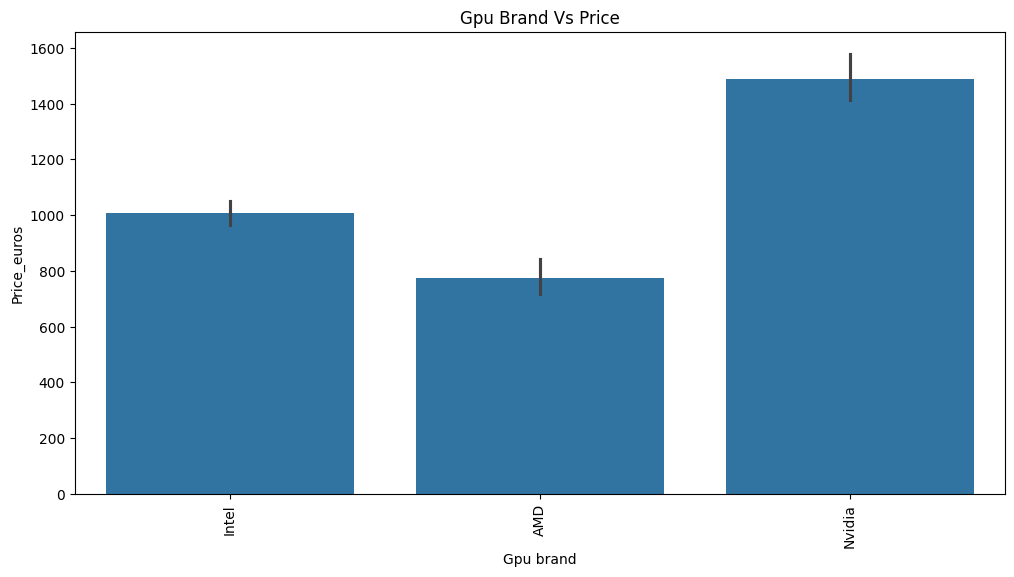

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'])
plt.title("Gpu Brand Vs Price")
plt.xticks(rotation=90)
plt.show()

The laptop with Nvidia Gpu cost gigher than other

In [48]:
df.drop(columns=['Gpu'],inplace=True)

<Axes: xlabel='count', ylabel='OpSys'>

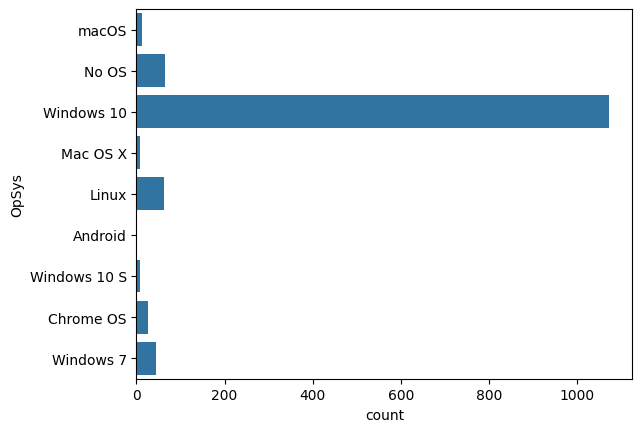

In [49]:
sns.countplot(df['OpSys'])

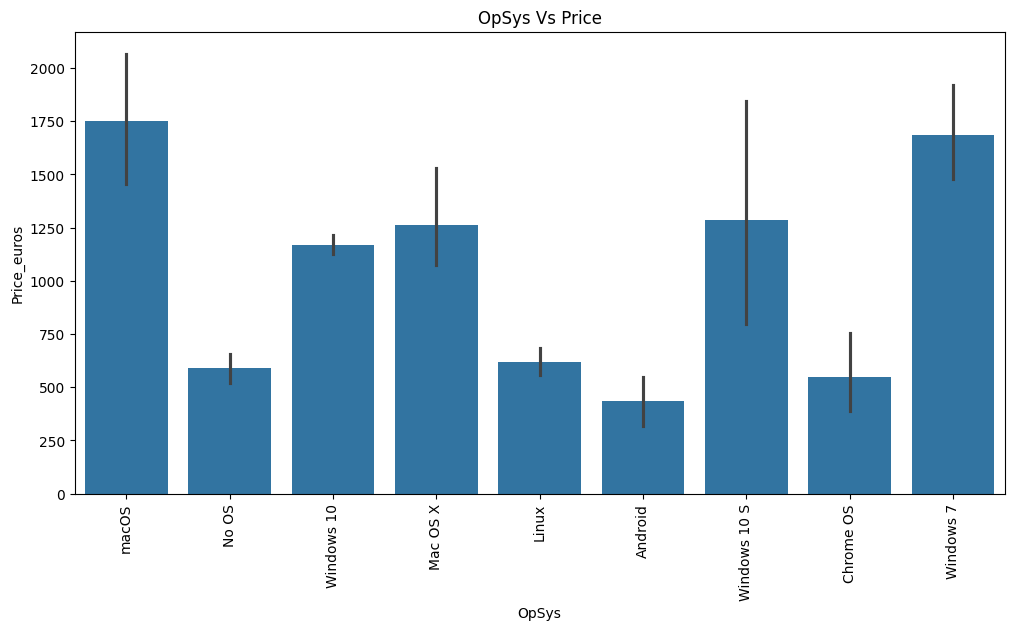

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.title("OpSys Vs Price")
plt.xticks(rotation=90)
plt.show()

In [51]:
def laptop_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

df['os'] = df['OpSys'].apply(laptop_os)

In [52]:
df['os'].value_counts()

,count
os,
Windows,1125
Others,156
Mac,21


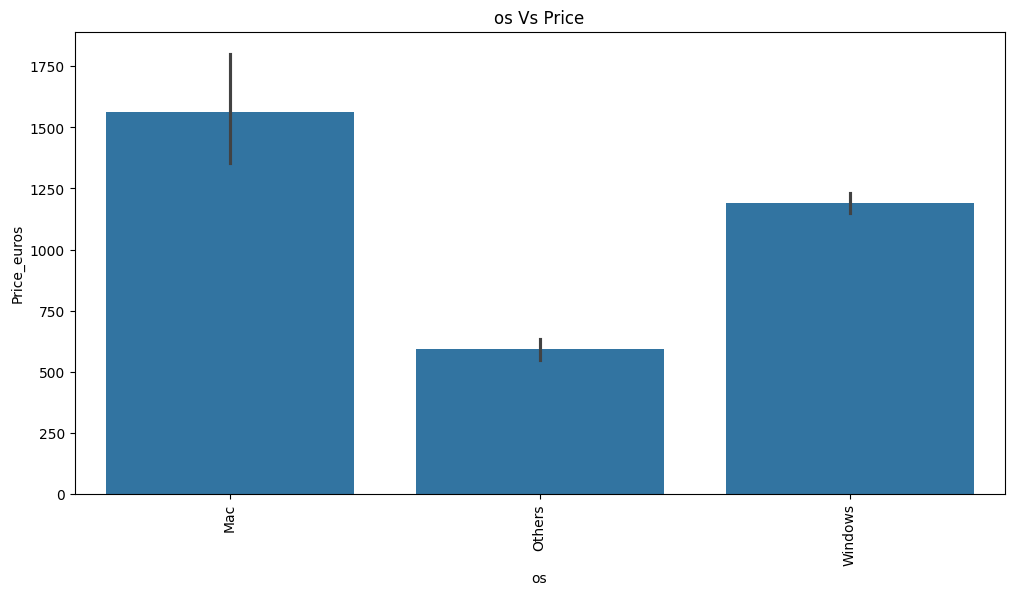

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.title("os Vs Price")
plt.xticks(rotation=90)
plt.show()

Mac OS cost higher than other

In [54]:
df.drop(columns=['OpSys'],inplace=True)

In [55]:
num_columns=df.select_dtypes(exclude='object').columns
num_columns

Index(['Ram', 'Weight', 'Price_euros', 'Torchscreen', 'Ips', 'ppi', 'HDD',
       'SSD'],
      dtype='object')

<Axes: >

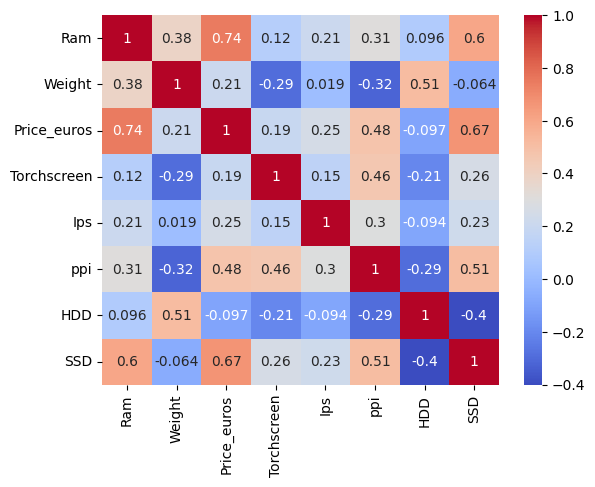

In [56]:
sns.heatmap(df[num_columns].corr(),annot=True, cmap='coolwarm')

Upgrading RAM, SSD, and display quality (PPI, IPS, Touchscreen) has the most impact on increasing laptop prices.

In [57]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Ram', 'Weight', 'Price_euros',
       'Torchscreen', 'Ips', 'ppi', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand',
       'os'],
      dtype='object')

In [58]:
df.head()

,Company,Product,TypeName,Ram,Weight,Price_euros,Torchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,MacBook Pro,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [59]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,29
250 G6,21
Legion Y520-15IKBN,19
Vostro 3568,19
...,...
SmartBook 130,1
A541NA-GO342 (N3350/4GB/500GB/Linux),1
17-X047na (i3-6006U/8GB/1TB/W10),1


In [60]:
df.drop(columns=['Product'],inplace=True)

In [61]:
cat_columns=df.select_dtypes(include='object').columns
cat_columns
label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [62]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [63]:
X

,Company,TypeName,Ram,Weight,Torchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,1,4,8,1.37,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,0,1,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4,1.80,1,1,157.350512,3,0,128,1,2
1299,10,0,16,1.30,1,1,276.053530,3,0,512,1,2
1300,10,3,2,1.50,0,0,111.935204,4,0,0,1,2
1301,7,3,6,2.19,0,0,100.454670,3,1000,0,0,2


In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [65]:

X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.15,random_state=2)

In [66]:
df.isna().sum()

,0
Company,0
TypeName,0
Ram,0
Weight,0
Price_euros,0
Torchscreen,0
Ips,0
ppi,0
Cpu brand,0
HDD,0


Building Primary model


In [67]:
class LinearRegression:
    def __init__(self,L=0.001,epochs=1000,m=0,c=0):
        self.L=L
        self.epochs=epochs
        self.m=None
        self.c=0
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.m=np.zeros(n_features)
        for _ in range(self.epochs):
            y_pred = np.dot(x, self.m) + self.c
            d_m = (-2/n_samples) * np.dot(x.T, (y - y_pred))
            d_c = (-2/n_samples) * np.sum(y - y_pred)
            self.m -= self.L * d_m
            self.c -= self.L * d_c
    def predict(self,x):
        return np.dot(x, self.m) + self.c

In [68]:
model=LinearRegression()
model.fit(X_train,y_train)

In [69]:
y_pred=model.predict(X_test)

In [70]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr_results = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R2': r2_score(y_test, y_pred)
}

print("LinearRegressor Result")
print(lr_results)

LinearRegressor Result
{'MAE': 0.938240099921639, 'RMSE': 1.0038900554849155, 'R2': -1.6344067277344192}


The base model Linear regression perform poorly on predicting the laptop prices

In [71]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.15,random_state=2)

Building two model

Decision Tree

In [76]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [78]:

dt_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'R2': r2_score(y_test, y_pred_dt)
}

print("Decision tree Result")
print(dt_results)

Decision tree Result
{'MAE': 0.19016952080017874, 'RMSE': 0.2668642377151071, 'R2': 0.8138378959058636}


The model shows strong performance with an R² of 0.814, indicating it explains most of the variance in the data. The MAE (0.190) and RMSE (0.267) are relatively low, suggesting accurate predictions with minimal error

KNN

In [79]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [81]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
knn_results = {
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn)),
    'R2': r2_score(y_test, y_pred_knn)
}

print("KNN Result")
print(dt_results)

KNN Result
{'MAE': 0.19016952080017874, 'RMSE': 0.2668642377151071, 'R2': 0.8138378959058636}


Both model gives same result

HyperParameter tuning for decisin tree

In [84]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)

random_search_dt.fit(X, y)

print("Best hyperparameters:", random_search_dt.best_params_)
print("Best model score:", random_search_dt.best_score_)
best_model = random_search_dt.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
Best model score: 0.7976252451946231


In [85]:
best_model.fit(X_train, y_train)
y_pred_dt_hp=best_model.predict(X_test)

In [86]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
dt_hp_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt_hp)),
    'R2': r2_score(y_test, y_pred_dt_hp)
}

print("Decision tree Result")
print(dt_hp_results)

Decision tree Result
{'MAE': 0.18898122035304313, 'RMSE': 0.24676936484700737, 'R2': 0.8408183474380251}


After hyperparameter tuning of decisin tree the performance is improved as r2 score is improverd from 0.81 ti 0.84

Hyperparameter for KNN

In [87]:
param_dist = {
    'n_neighbors': np.arange(1, 50, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': np.arange(10, 50, 5)
}

random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search_knn.fit(X, y)

print("Best hyperparameters:", random_search_knn.best_params_)
print("Best model score:", random_search_knn.best_score_)
best_model_knn = random_search_knn.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 10}
Best model score: 0.7482582223547722


In [88]:
best_model_knn.fit(X_train, y_train)
y_pred_knn_hp=best_model_knn.predict(X_test)

In [89]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
knn_hp_results = {
    'MAE': mean_absolute_error(y_test, y_pred_knn_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn_hp)),
    'R2': r2_score(y_test, y_pred_knn_hp)
}

print("Knn Result")
print(knn_hp_results)

Knn Result
{'MAE': 0.1479450714948067, 'RMSE': 0.2142843949602561, 'R2': 0.8799695006599628}


After hyperparametertuning Knn perform better than the decesion tree also with r2 score 0.87

Feature selection For KNN using SelectKBest

In [97]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
print(selector.get_support(indices=True))

[ 0  2  3  4  5  6  7  9 10 11]


Feature selection using RFECV

In [109]:
from sklearn.feature_selection import RFECV
dt_reg=DecisionTreeRegressor()
rfecv = RFECV(estimator=dt_reg, step=0.05, cv=5, scoring="r2", n_jobs=-1, min_features_to_select=int(0.8 * X_train.shape[1]),verbose=1)
rfecv.fit(X_train, y_train)

X_train_selected_dt = rfecv.transform(X_train)
X_test_selected_dt = rfecv.transform(X_test)

print(f"✅ Optimal Number of Features: {rfecv.n_features_}")
print(f"📊 Selected Features Mask: {rfecv.support_}")

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
✅ Optimal Number of Features: 9
📊 Selected Features Mask: [ True  True  True  True False  True  True  True False  True False  True]


Model with best parameter and selected feature: Final Model

Decision tree Final Model

In [111]:
best_model.fit(X_train_selected_dt,y_train)
y_pred_dt_final=best_model.predict(X_test_selected_dt)
dt_final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt_final),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt_final)),
    'R2': r2_score(y_test, y_pred_dt_final)
}

print("Decision tree final Result")
print(dt_final_results)

Decision tree final Result
{'MAE': 0.18729604930848362, 'RMSE': 0.24429742647225292, 'R2': 0.8439914837417628}


Decision tree doesnot improve even after using selected feature

KNN Final Model

In [112]:
best_model_knn.fit(X_train_selected,y_train)
y_pred_knn_final=best_model_knn.predict(X_test_selected)
knn_final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_knn_final),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn_final)),
    'R2': r2_score(y_test, y_pred_knn_final)
}

print("KNN final Result")
print(knn_final_results)

KNN final Result
{'MAE': 0.1650116735483605, 'RMSE': 0.22155538565635846, 'R2': 0.8716856744561696}


KNN also didn't show any improvement even after using only the selected features

Final Conclusion:
KNN outperforms decision tree in predicting the laptop prices
so Knn with 0.87 r2 score and Decision tree with 0.84 r2 score